In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [5]:
df = yf.download('^GSPC', start='2023-1-1')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2023-06-16,4440.950195,4448.470215,4407.439941,4409.589844,4409.589844,6848600000
2023-06-20,4396.109863,4400.149902,4367.189941,4388.709961,4388.709961,4055790000
2023-06-21,4380.009766,4386.220215,4360.140137,4365.689941,4365.689941,3709330000


In [7]:
df.Low.rolling(5).min()

Date
2023-01-03            NaN
2023-01-04            NaN
2023-01-05            NaN
2023-01-06            NaN
2023-01-09    3794.330078
                 ...     
2023-06-16    4304.370117
2023-06-20    4337.850098
2023-06-21    4337.850098
2023-06-22    4351.819824
2023-06-23    4341.339844
Name: Low, Length: 119, dtype: float64

In [8]:
df.Low.rolling(5, center=True).min()

Date
2023-01-03            NaN
2023-01-04            NaN
2023-01-05    3794.330078
2023-01-06    3802.419922
2023-01-09    3802.419922
                 ...     
2023-06-16    4337.850098
2023-06-20    4351.819824
2023-06-21    4341.339844
2023-06-22            NaN
2023-06-23            NaN
Name: Low, Length: 119, dtype: float64

In [9]:
df.Low == df.Low.rolling(5, center=True).min()

Date
2023-01-03    False
2023-01-04    False
2023-01-05    False
2023-01-06    False
2023-01-09    False
              ...  
2023-06-16    False
2023-06-20    False
2023-06-21    False
2023-06-22    False
2023-06-23    False
Name: Low, Length: 119, dtype: bool

In [10]:
df[df.Low == df.Low.rolling(5, center=True).min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19,3911.840088,3922.939941,3885.540039,3898.850098,3898.850098,3991500000
2023-01-25,3982.709961,4019.550049,3949.060059,4016.219971,4016.219971,3724020000
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,4090.459961,3891520000
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000
2023-03-02,3938.679932,3990.840088,3928.159912,3981.350098,3981.350098,4244900000
2023-03-13,3835.120117,3905.050049,3808.860107,3855.760010,3855.760010,6558020000
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000
2023-04-06,4081.149902,4107.319824,4069.840088,4105.020020,4105.020020,3486690000
2023-04-26,4087.780029,4089.669922,4049.350098,4055.989990,4055.989990,3837030000


In [11]:
supports = df[df.Low == df.Low.rolling(5, center=True).min()].Low
resistances = df[df.High == df.High.rolling(5, center=True).max()].High

In [12]:
supports

Date
2023-01-19    3885.540039
2023-01-25    3949.060059
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-04-26    4049.350098
2023-05-04    4048.280029
2023-05-10    4098.919922
2023-05-24    4103.979980
2023-06-08    4261.069824
Name: Low, dtype: float64

In [13]:
resistances

Date
2023-01-17    4015.389893
2023-01-23    4039.310059
2023-01-27    4094.209961
2023-02-02    4195.439941
2023-02-14    4159.770020
2023-03-06    4078.489990
2023-03-16    3964.459961
2023-03-22    4039.489990
2023-04-04    4133.129883
2023-04-18    4169.479980
2023-05-01    4186.919922
2023-05-10    4154.279785
2023-05-19    4212.910156
2023-06-05    4299.279785
2023-06-16    4448.470215
Name: High, dtype: float64

In [14]:
levels = pd.concat([supports, resistances])

In [15]:
levels.diff()

Date
2023-01-19           NaN
2023-01-25     63.520020
2023-02-10    111.729980
2023-02-24   -117.709961
2023-03-02    -14.920166
2023-03-13   -119.299805
2023-03-24    100.299805
2023-04-06    160.680176
2023-04-26    -20.489990
2023-05-04     -1.070068
2023-05-10     50.639893
2023-05-24      5.060059
2023-06-08    157.089844
2023-01-17   -245.679932
2023-01-23     23.920166
2023-01-27     54.899902
2023-02-02    101.229980
2023-02-14    -35.669922
2023-03-06    -81.280029
2023-03-16   -114.030029
2023-03-22     75.030029
2023-04-04     93.639893
2023-04-18     36.350098
2023-05-01     17.439941
2023-05-10    -32.640137
2023-05-19     58.630371
2023-06-05     86.369629
2023-06-16    149.190430
dtype: float64

In [16]:
abs(levels.diff())

Date
2023-01-19           NaN
2023-01-25     63.520020
2023-02-10    111.729980
2023-02-24    117.709961
2023-03-02     14.920166
2023-03-13    119.299805
2023-03-24    100.299805
2023-04-06    160.680176
2023-04-26     20.489990
2023-05-04      1.070068
2023-05-10     50.639893
2023-05-24      5.060059
2023-06-08    157.089844
2023-01-17    245.679932
2023-01-23     23.920166
2023-01-27     54.899902
2023-02-02    101.229980
2023-02-14     35.669922
2023-03-06     81.280029
2023-03-16    114.030029
2023-03-22     75.030029
2023-04-04     93.639893
2023-04-18     36.350098
2023-05-01     17.439941
2023-05-10     32.640137
2023-05-19     58.630371
2023-06-05     86.369629
2023-06-16    149.190430
dtype: float64

In [17]:
levels = pd.concat([supports, resistances])

In [19]:
levels = levels[abs(levels.diff()) > 100]

In [21]:
levels

Date
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-06-08    4261.069824
2023-01-17    4015.389893
2023-02-02    4195.439941
2023-03-16    3964.459961
2023-06-16    4448.470215
dtype: float64

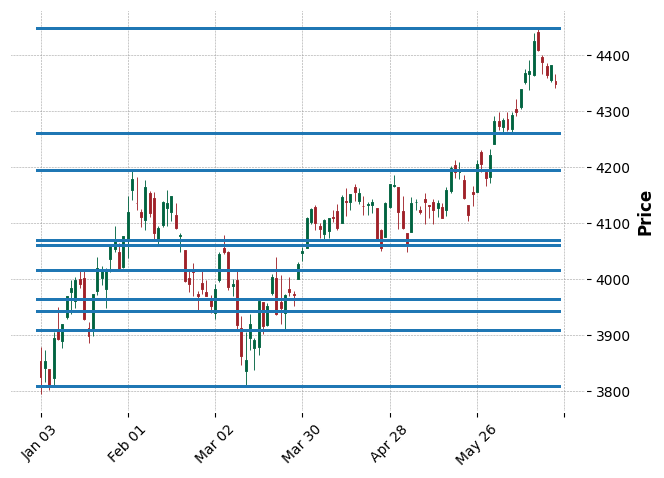

In [20]:
mpf.plot(df, type='candle', hlines=levels.to_list(), style='charles')

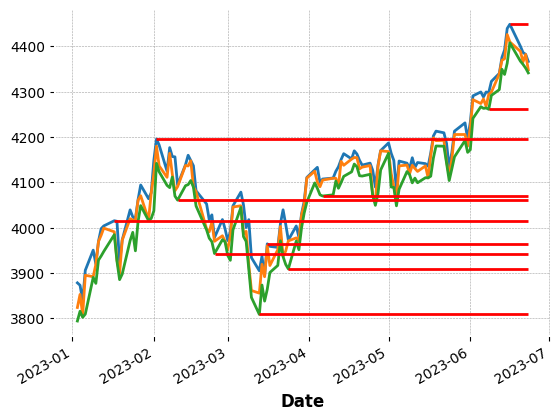

In [24]:
df.High.plot()
df.Close.plot()
df.Low.plot()
plt.hlines(levels, xmin=levels.index, xmax=df.index[-1], colors='red')